# Linear regression and Gradient Descent in ``Python``

This notebook quickly introduces the **gradient descent** algorithm by looking at an analysis classic: linear regression. In doing so, we also get our first taste of **supervised** learning. Let's jump straight in!

## Regression with `sklearn`

It's very easy to run a linear regression model using the `sklearn` library. Start by loading the necessary libraries:

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # To visualize data

Now let's simulate some data to work with:

In [2]:
# Generate some sample data
np.random.seed(0)
N = 500
X = 2 * np.random.rand(N, 1)
y = 4 + 3 * X + np.random.randn(N, 1)

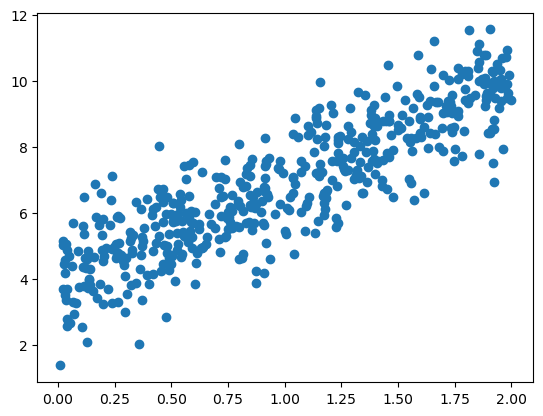

In [3]:
plt.scatter(X, y)

In [6]:
print(X.shape)
print(y.shape)

(500, 1)
(500, 1)


In [7]:
model = LinearRegression()
fit = model.fit(X, y)

In [8]:
print(f'intercept = {fit.intercept_[0]}')
print(f'slope = {fit.coef_[0][0]}')

intercept = 3.885506032525154
slope = 3.0144751630258098


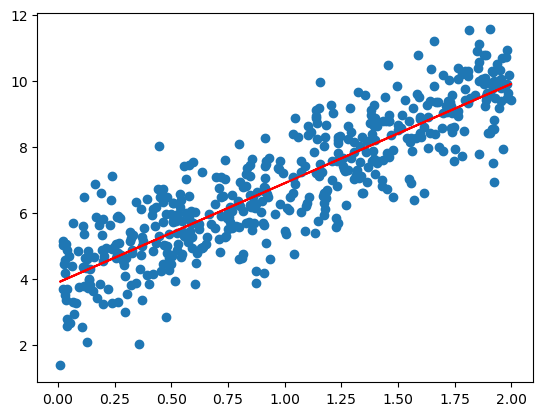

In [9]:
y_hat = fit.predict(X)
plt.scatter(X, y)
plt.plot(X, y_hat, color='red')

## Regression using the `statsmodels`

While it's useful to see the `sklearn` library in action (given that we will use it A LOT in this module!), the `statsmodels` library is much better for doing statistics in Python (see the [documentation](https://www.statsmodels.org/stable/index.html)). Start by installing `statsmodels` if you haven't done so already:

In [10]:
!python -m pip install statsmodels

And import the `statsmodels` API:

In [11]:
import statsmodels.api as sm

To fit an ordinary least squares regression (what we've simple been calling a linear regression), you type:

In [12]:
# You can add a constant to your model if you want one
X_b = sm.add_constant(X)
# Instantiate the model
model = sm.OLS(y, X_b)
# Fit the model
fit = model.fit()
# Print the model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1587.
Date:                Mon, 20 Jan 2025   Prob (F-statistic):          5.66e-157
Time:                        10:54:45   Log-Likelihood:                -701.55
No. Observations:                 500   AIC:                             1407.
Df Residuals:                     498   BIC:                             1416.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8855      0.087     44.591      0.0

As you can see, `statsmodels` provides useful information on the model's fit, uncertainty for the estimated coefficients, etc., which `sklearn` does not provide. `statsmodels` many of the methods and models that you would expect from a library devoted to statistical analysis. For instance, say we wanted to fit our OLS with `robust` standard errors:

In [ ]:
model = sm.OLS(y, X_b)
print(model.fit(cov_type='HC3').summary())

Again, see the `statsmodels` library see the [documentation](https://www.statsmodels.org/stable/index.html) for more information on the models that are supported.

## Gradient Descent

As we discussed in class, the **gradient descent** algorithm offers a general purpose means of computationally minimizing a loss curve. Before seeing how to (easily!) implement gradient descent using `sklearn`, let's get a feel for the nuts and bolts by rolling our own function. Don't worry if this looks scary, we will go through it line-by-line!

In [13]:
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    """
    Perform gradient descent to fit a linear regression model.
    
    Args:
        X (numpy.ndarray): Input features (independent variables).
        y (numpy.ndarray): Target values (dependent variable).
        learning_rate (float): Learning rate for gradient descent (default: 0.01).
        num_iterations (int): Number of iterations for gradient descent (default: 1000).
    
    Returns:
        tuple: A tuple containing two elements:
            - theta (numpy.ndarray): The learned parameters (slope and intercept).
            - cost_history (list): A list of cost values for each iteration.
    """
    m = len(y)  # Number of data points
    theta = np.zeros(2)  # Initialize parameters (slope and intercept)
    cost_history = []  # Store cost values for visualization

    for _ in range(num_iterations):
        # Calculate predictions using the current parameters. Reshape as
        # a 2-D numpy matrix
        y_pred = X.dot(theta).reshape(-1, 1)
        
        # Calculate the error (the difference between predictions and actual values)
        error = y_pred - y
        
        # Calculate the gradient for each parameter
        gradient = (1/m) * X.T.dot(error)
        
        # Update parameters using gradient descent
        theta -= learning_rate * gradient.flatten()
        
        # Calculate the cost (mean squared error) for this iteration
        cost = (1/(2*m)) * np.sum(error**2) # L2 norm
        # cost = (1/m) * np.sum(np.abs(error))

        cost_history.append(cost)
    
    return theta, cost_history

In [14]:
theta, cost_history = gradient_descent(X_b, y, learning_rate=.1, num_iterations=1000)

print("Learned parameters (theta):", theta)

Learned parameters (theta): [3.88550593 3.01447525]


### Gradient descent in `sklearn`

Now the `sklearn` version. Import the model:

In [15]:
from sklearn.linear_model import SGDRegressor

And follow the exact same procedure as we did for linear regression:

In [16]:
model = SGDRegressor(eta0=.1, penalty=None) # learning rate .1, this is how to change default
fit = model.fit(X, y.ravel())

In [17]:
print(f'intercept = {fit.intercept_[0]}')
print(f'slope = {fit.coef_[0]}')

intercept = 3.8672150719366996
slope = 3.0078524183430537


## **IMPORTANT**: In-sample fit versus out-of-sample performance

So far our focus has been trying to find a model that **fits** our data, focusing on ways to update our model **parameters** to reduce **loss**. In machine learning speak, this process is referred to a model **training**. However, training is only one half of supervised machine learning; the other half focuses on **testing** our model using held-out data. To do so, we focus on what's typically referred to as **out-of-sample performance**.

Why "out-of-sample"? In short, it is very easy to **overfit** when using complicated models (i.e., models with lots of weights). Let's get a feel for overfitting and out-of-sample performance by fitting increasingly complex models to our simulated `X` and `y` data above. First, let's start by splitting out data into a **training set** and **testing** set using the `train_test_split` funciton from `sklearn`:

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=.2, random_state=42)
print(X_b.shape, X_train.shape, X_test.shape) # notice the difference in dimensions

(500, 2) (400, 2) (100, 2)


### An example of **overfitting**

We'll use a small dataset to illustrate overfitting, as this will make it easier to see. (**NOTE**: I am only doing this for pedagogical, it's typically not a good idea to throw away data!) Let's use the first 25 observations to fit our model:

In [21]:
X_train = X_train[0:25,:]
y_train = y_train[0:25]

Next, let's re-fit out bivariate model using our training set:

In [22]:
model1 = sm.OLS(y_train, X_train)
# Fit the model
fit1 = model1.fit()
# Print the model summary
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     69.22
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.18e-08
Time:                        11:02:50   Log-Likelihood:                -30.395
No. Observations:                  25   AIC:                             64.79
Df Residuals:                      23   BIC:                             67.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2413      0.370     11.462      0.0

Now we need to create a more "complicated" model. One way to do this is by introducing additional polynomial terms. For instance, let's start by adding a squared term:

In [23]:
x2 = X_train[:,1] ** 2 # square x
x2 = x2.reshape(-1, 1) # reshape to column vector
X2_train = np.hstack((X_train, x2)) # merge with original X_train
print(X2_train[0:5,:]) # print first 5 rows

[[1.         0.97611256 0.95279573]
 [1.         1.33171824 1.77347346]
 [1.         1.7400243  3.02768455]
 [1.         0.11074864 0.01226526]
 [1.         0.11369615 0.01292682]]


In [24]:
model2 = sm.OLS(y_train, X2_train)
# Fit the model
fit2 = model2.fit()
# Print the model summary
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     36.68
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           9.84e-08
Time:                        11:04:52   Log-Likelihood:                -29.420
No. Observations:                  25   AIC:                             64.84
Df Residuals:                      22   BIC:                             68.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8430      0.579      8.365      0.0

What if we kept repeating this process? Let's do it 5 times:

In [25]:
X_poly_train = X_train
for i in range(2, 5):
    x_poly = X_train[:,1] ** i # square x
    x_poly = x_poly.reshape(-1, 1) # reshape to column vector
    X_poly_train = np.hstack((X_poly_train, x_poly)) # merge with original X_train
    model_poly = sm.OLS(y_train, X_poly_train)
    # Fit the model
    fit_poly = model_poly.fit()
    print(f'x^{i} R^2 = {fit_poly.rsquared}')

x^2 R^2 = 0.7693164283452463
x^3 R^2 = 0.7750195781412332
x^4 R^2 = 0.8185261601009155


The in-sample fit (as measured by R-squared) becomes a little better with each additional term. However, how well to do this models perform out-of-sample? To examine this question, let's focus on one common metric for out-of-sample performance for regression problems: the **root mean squared error**. Start by importing the `mean_squared_error` function from `sklearn`:

In [26]:
from sklearn.metrics import mean_squared_error

Let's get a feel for how this works using our bivariate model:

In [27]:
# Get predictions from "model1" fit above
y_pred = fit1.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.9076267279558999
Root Mean Squared Error: 0.9526944567676984


How does this compare to our 25 parameter model? First, we need to create the 25 polynomial terms for our test data:

In [28]:
X_poly_test = X_test
for i in range(2, 5):
    x_poly = X_test[:,1] ** i # square x
    x_poly = x_poly.reshape(-1, 1) # reshape to column vector
    X_poly_test = np.hstack((X_poly_test, x_poly)) # merge with original X_train

In [29]:
# Get predictions from "model1" fit above
y_pred = fit_poly.predict(X_poly_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2.2617526443648184
Root Mean Squared Error: 1.5039124457111253


In summary, we've 1) added additional complexity to our model, got a better in-sample fit (as measured by R-squared), but our out-of-sample fit is considerably worse. That's overfitting!

## Performance metrics for regression

We've already seen the popular **RMSE** metric for judging out-of-sample performance for regression. Honestly, there are not too many others to choose from! We'll quickly look at the two other metrics sometimes used to assess out-of-sample fit for regression models: mean absolute error (MAE) and R-squared for held-out data.

In [30]:
from sklearn.metrics import mean_absolute_error, r2_score

Each of these metrics are called in the same way using `sklearn`. For `mean_absolute_error`:

In [33]:
# Get predictions from "model1" fit above
y_pred = fit1.predict(X_test)

# Calculate mean squared error
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mse)

Mean Absolute Error: 2.2617526443648184


And now using the `r2_score` function:

In [34]:
# Get predictions from "model1" fit above
y_pred = fit1.predict(X_test)

# Calculate mean squared error
r2 = r2_score(y_test, y_pred)

print("Out of sample R-squared:", r2)

Out of sample R-squared: 0.7315583968778696


## Predicting housing prices

Now it's time for you to try on your own! Let's build a model to predict housing prices, using the dataset described [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques). Start by loading the `housing.csv` dataset:

In [35]:
import statsmodels.formula.api as sm # this will allow for R-like formulas
import pandas as pd
data = pd.read_csv('data/housing.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/housing.csv'

Next, split the data into a training and testing set:

In [ ]:
data_train, data_test, y_train, y_test = train_test_split(data, data.SalePrice, test_size=.3, random_state=42)
data_train.head()

We can get basic descriptive statistics to get a "feel" for our dataset:

In [ ]:
data_train.describe()

We can fit a model using the "formula" notation similar to `R`:

In [ ]:
fit = sm.ols(formula="SalePrice ~ LotArea", data=data_train).fit()
print(fit.summary())

We can also get out-of-sample predictions for our model using a formula. However, the syntax is a little different:

In [ ]:
y_pred = fit.predict(exog=data_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

# Calculate mean squared error
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mse)

# Calculate mean squared error
r2 = r2_score(y_test, y_pred)

print("Out of sample R-squared:", r2)

### Can you find a better model?

Using the training and testing data above (note: you need to use the exact same random seed!), can you find a model with better out-of-sample performance? You should:

1. Try regression models using different features (i.e., variables), different functional forms, etc.
2. Calculate the out-of-sample performance of the model each different model.
3. Which specification gives you the best performance?

Good luck!